<a href="https://colab.research.google.com/github/HeyMengxu/ComputerVision/blob/main/5330_Lab1_Mengxu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Sky Area Using Non-Machining Learning Techniques

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

Convert image from RGB to HSV

Mounted at /content/drive


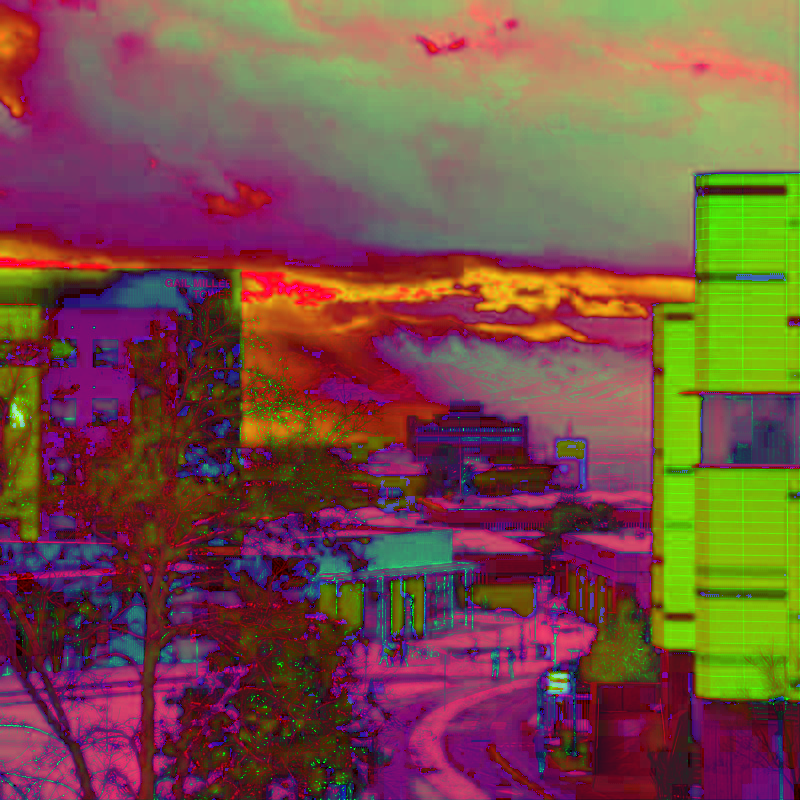

In [2]:
# Mount Google Drive (only run this cell once)
#drive.mount('/content/drive')

# import image
img = cv2.imread('/content/drive/MyDrive/CV/sky.jpeg')
#conver image from BGR to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_img)

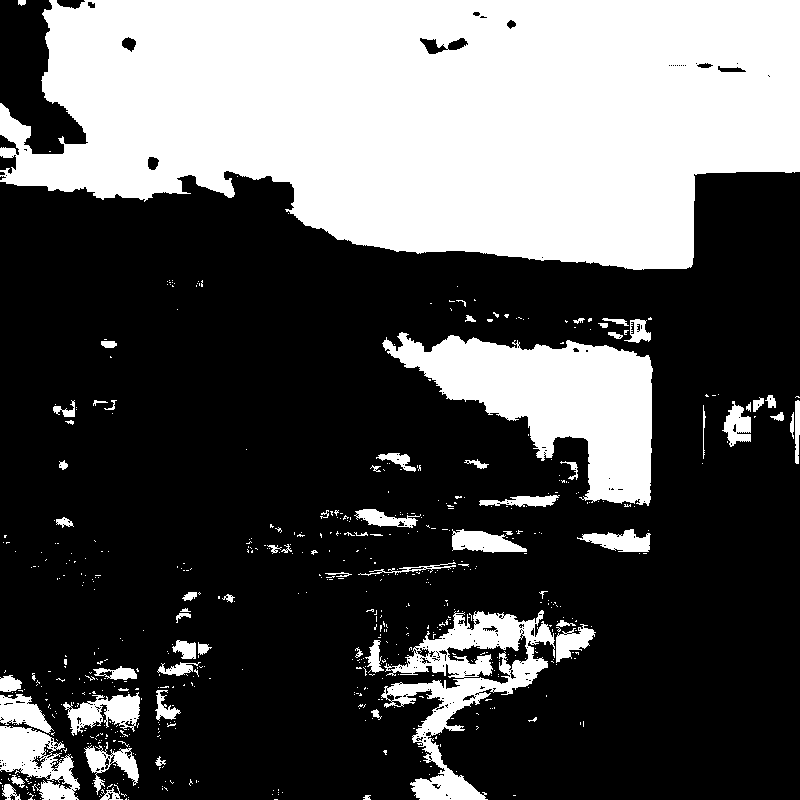

In [3]:
#Equalize the histogram of the value channel to enhance the brightness
h, s, v = cv2.split(hsv_img)
v = cv2.equalizeHist(v)
mer_img = cv2.merge((h, s, v))

#Define detect range
iLow = np.array([100, 43, 46])
iHigh = np.array([124, 255, 255])

#Create mask
rng_img = cv2.inRange(mer_img, iLow, iHigh)
cv2_imshow(rng_img)

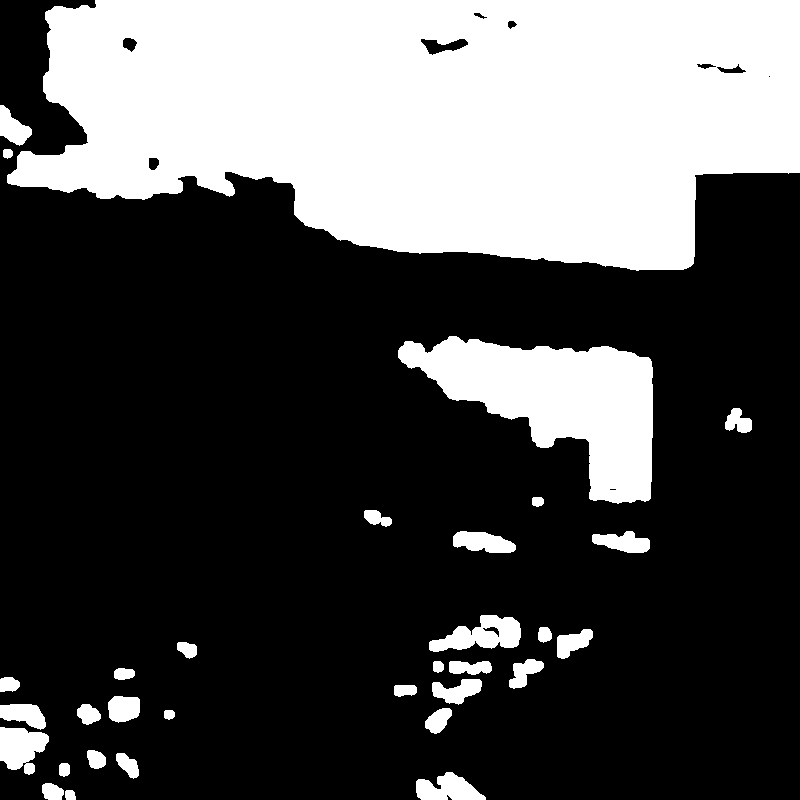

In [4]:
#Use dilation and erosion to refine mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
erode_img = cv2.erode(rng_img, kernel)
dlt_img = cv2.dilate(erode_img, kernel)
cv2_imshow(dlt_img)

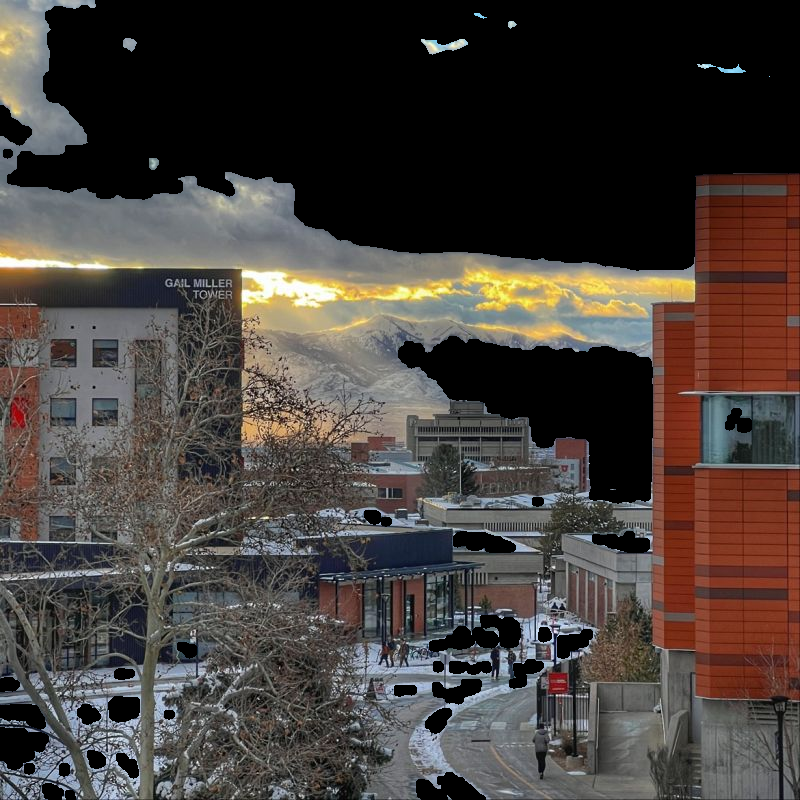

-1

In [5]:
#Adjust threshold and produce result
ret, mask = cv2.threshold(dlt_img, 150, 255, cv2.THRESH_BINARY)
notmask = cv2.bitwise_not(mask)
frontpic = cv2.bitwise_and(img, img, mask=notmask)

cv2_imshow(frontpic)
cv2.waitKey(0)


In [6]:
# Creating a demo using Gradio
# If run this part seperately, libraries need to be reimported here

!pip install gradio

  # Mount Google Drive (only run this cell once)
  #drive.mount('/content/drive')

def detect_sky(image_path):

  img = cv2.imread(image_path)

  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  h, s, v = cv2.split(hsv_img)
  v = cv2.equalizeHist(v)
  mer_img = cv2.merge((h, s, v))

  iLow = np.array([100, 43, 46])
  iHigh = np.array([124, 255, 255])

  rng_img = cv2.inRange(mer_img, iLow, iHigh)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
  erode_img = cv2.erode(rng_img, kernel)
  dlt_img = cv2.dilate(erode_img, kernel)

  ret, mask = cv2.threshold(dlt_img, 150, 255, cv2.THRESH_BINARY)
  notmask = cv2.bitwise_not(mask)
  frontpic = cv2.bitwise_and(img, img, mask=notmask)

  # Convert the image to RGB format (Gradio expects RGB)
  result_rgb = cv2.cvtColor(frontpic, cv2.COLOR_BGR2RGB)

    # Encode the image as bytes
  #_, result_bytes = cv2.imencode('.png', result_rgb)

    # Convert bytes to a NumPy array


  return result_rgb


import gradio as gr

demo = gr.Interface(fn=detect_sky,inputs=gr.Image(type="filepath"),outputs="image")

# Launch the Gradio interface in Colab
demo.launch()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.6 